<a href="https://colab.research.google.com/github/kxrrym03/Toyota-Used-Car-Insights/blob/main/Toyota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()




Saving toyota.csv to toyota.csv


In [ ]:
df = pd.read_csv('toyota.csv')
df.shape

(6738, 9)

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [ ]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3
6737,Urban Cruiser,2011,4495,Manual,45128,Petrol,125,50.4,1.3


In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [ ]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [ ]:
df.duplicated().sum()

np.int64(39)

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(6699, 9)

Visualizations

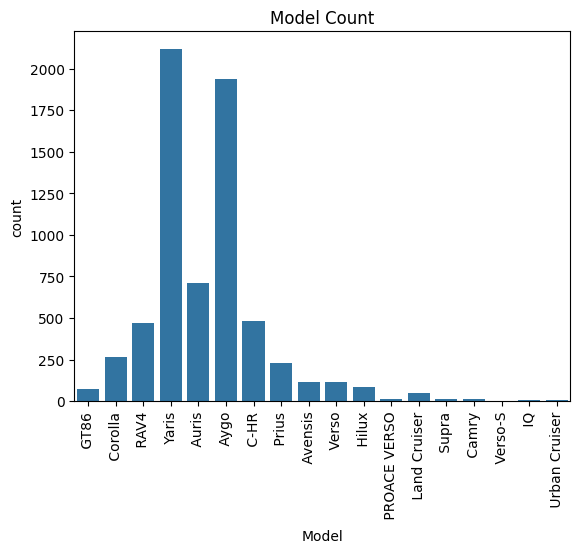

In [ ]:
sns.countplot(data=df,x='model')
plt.title('Model Count')
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.show()

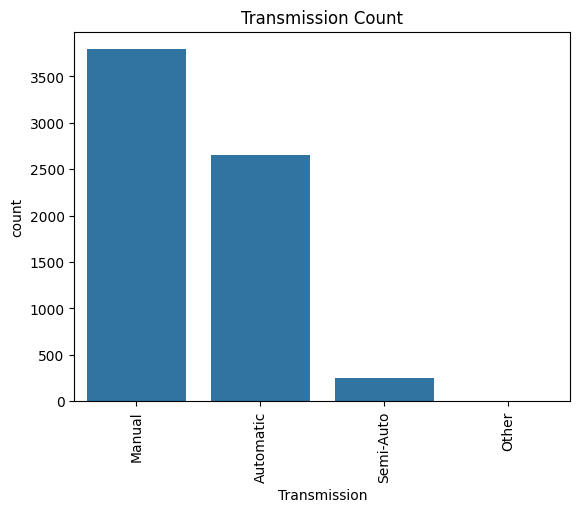

In [ ]:
sns.countplot(data=df,x='transmission')
plt.title('Transmission Count')
plt.xlabel('Transmission')
plt.xticks(rotation=90)
plt.show()

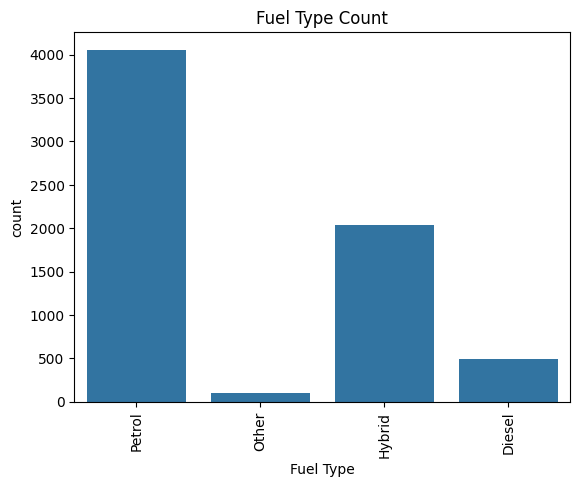

In [ ]:
sns.countplot(data=df,x='fuelType')
plt.title('Fuel Type Count')
plt.xlabel('Fuel Type')
plt.xticks(rotation=90)
plt.show()

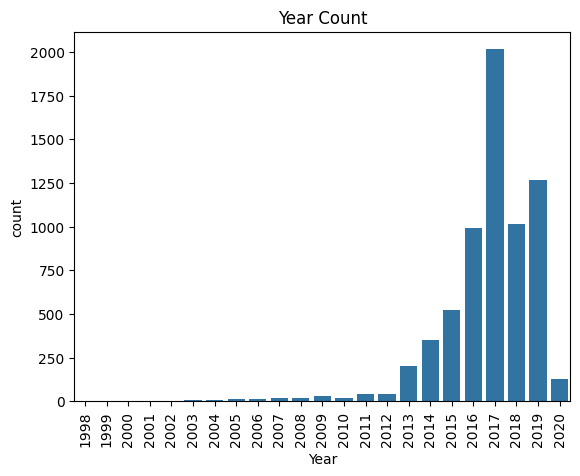

In [ ]:
sns.countplot(data=df,x='year')
plt.title('Year Count')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.show()

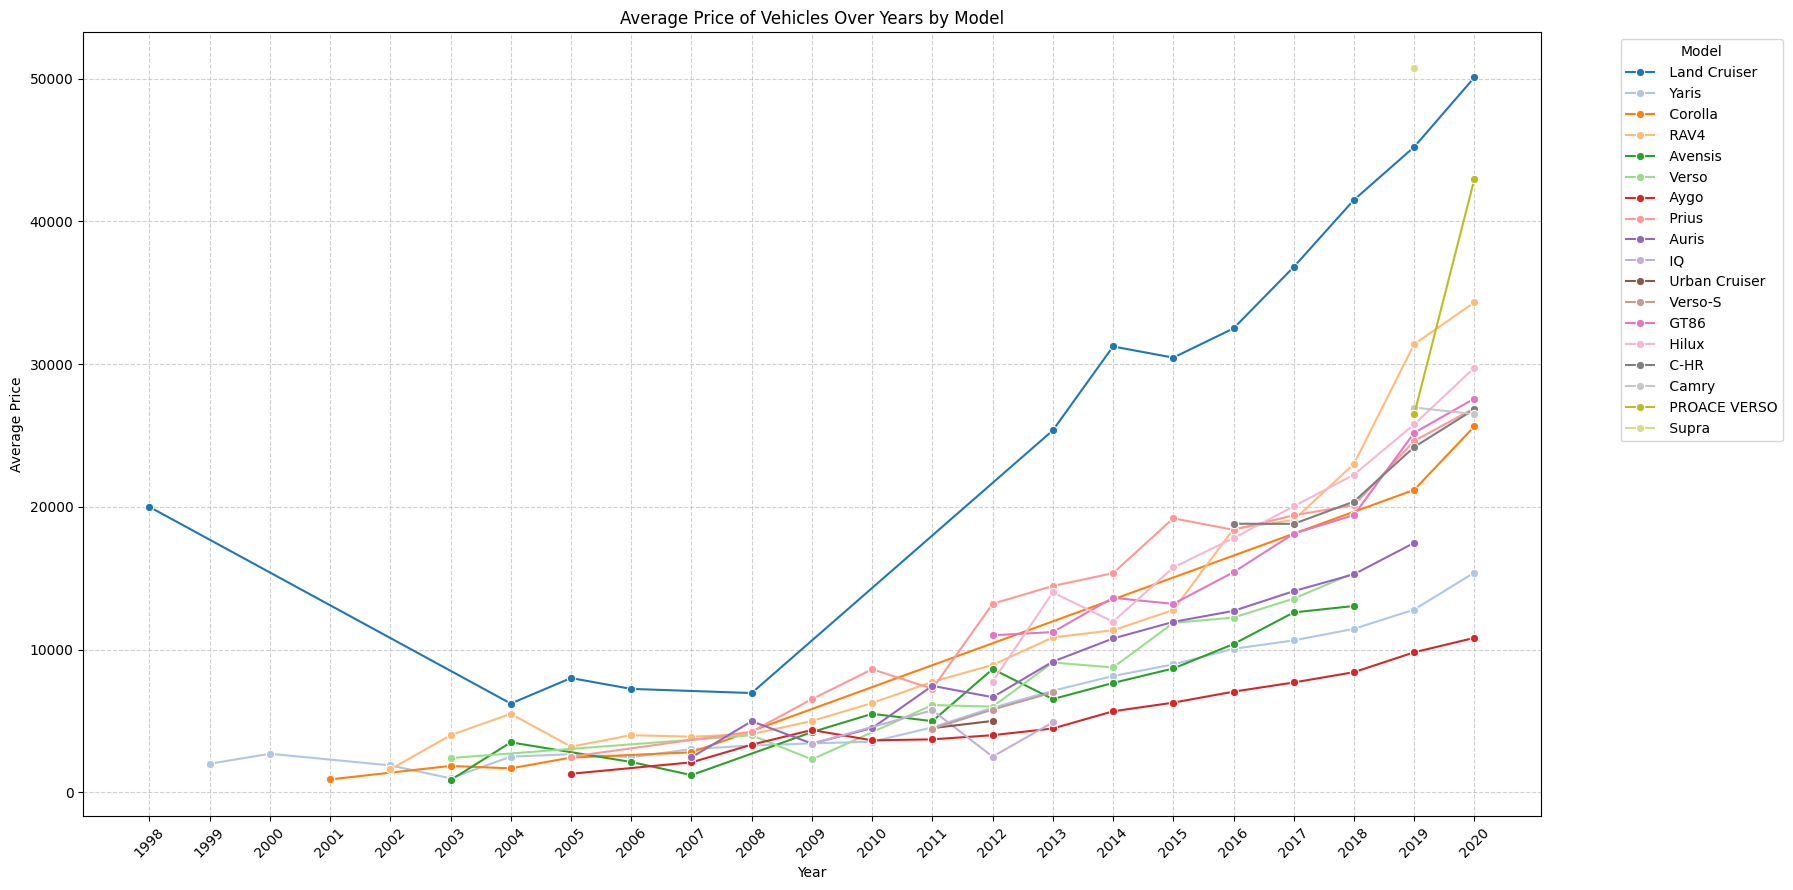

In [ ]:
model_year_price = df.groupby(['year', 'model'])['price'].mean().reset_index()

plt.figure(figsize=(18, 9))
sns.lineplot(data=model_year_price, x='year', y='price', hue='model', marker='o', palette='tab20')
plt.title('Average Price of Vehicles Over Years by Model')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(model_year_price['year'].unique().astype(int), rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

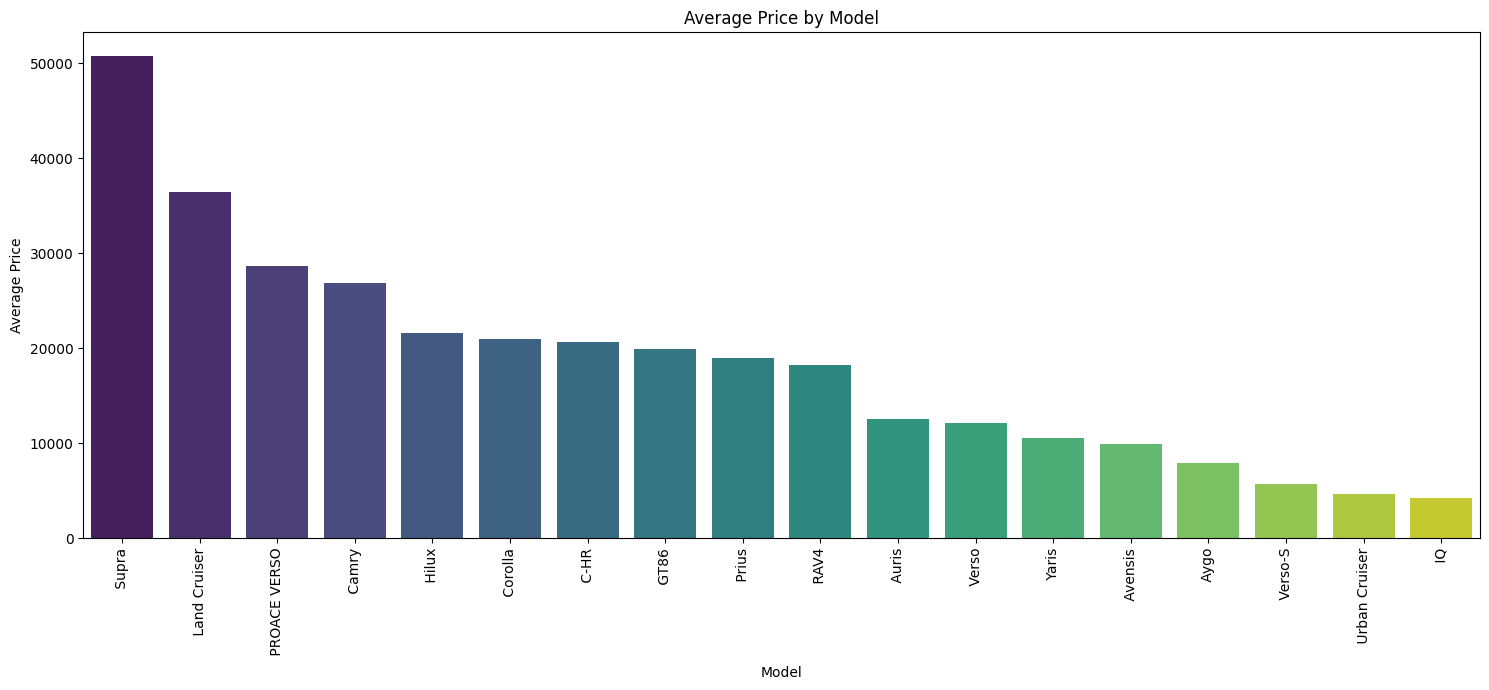

In [ ]:
model_avg_price = df.groupby('model')['price'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15, 7))
sns.barplot(data=model_avg_price, x='model', y='price', palette='viridis')
plt.title('Average Price by Model')
plt.xlabel('Model')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
avg_mileage_by_model = df.groupby('model')['mileage'].mean().sort_values(ascending=False).reset_index()
print("Average Mileage by Car Model:")
display(avg_mileage_by_model)

Average Mileage by Car Model:


,model,mileage
0,Verso-S,56045.666667
1,IQ,48742.500000
2,Avensis,47461.140351
3,Urban Cruiser,46995.500000
4,RAV4,35264.522484
5,Auris,32735.047955
6,Land Cruiser,32175.666667
7,Prius,31423.663793
8,Verso,28480.728070
9,Hilux,27798.870588


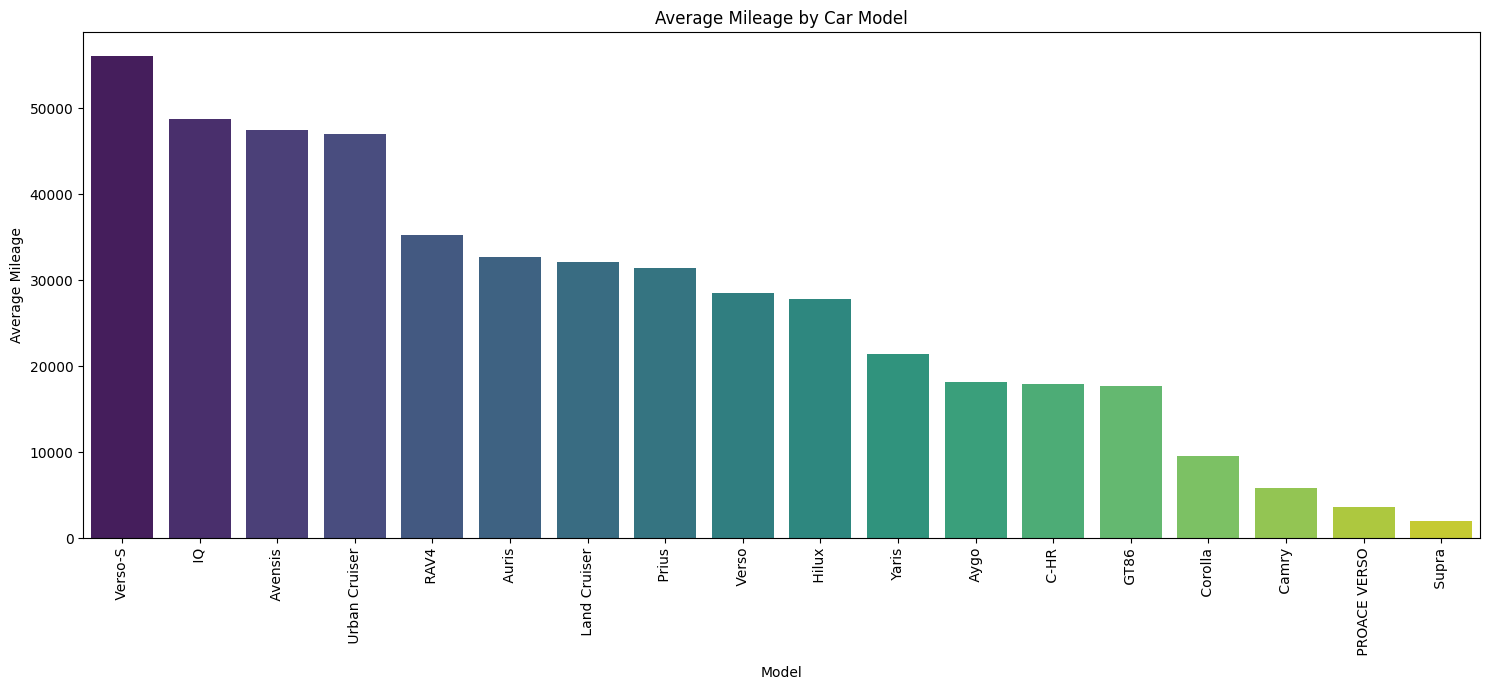

In [ ]:
avg_mileage_by_model = df.groupby('model')['mileage'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15, 7))
sns.barplot(data=avg_mileage_by_model, x='model', y='mileage', palette='viridis')
plt.title('Average Mileage by Car Model')
plt.xlabel('Model')
plt.ylabel('Average Mileage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
merged_df = pd.merge(model_avg_price, avg_mileage_by_model, on='model')
merged_df.rename(columns={'price': 'average_price', 'mileage': 'average_mileage'}, inplace=True)
print("Average Price and Mileage by Car Model:")
display(merged_df)

Average Price and Mileage by Car Model:


,model,average_price,average_mileage
0,Supra,50741.000000,1999.083333
1,Land Cruiser,36487.156863,32175.666667
2,PROACE VERSO,28680.200000,3616.733333
3,Camry,26910.090909,5861.727273
4,Hilux,21581.176471,27798.870588
5,Corolla,20972.675472,9567.441509
6,C-HR,20651.540710,17919.171190
7,GT86,19908.849315,17680.575342
8,Prius,18998.844828,31423.663793
9,RAV4,18200.421842,35264.522484


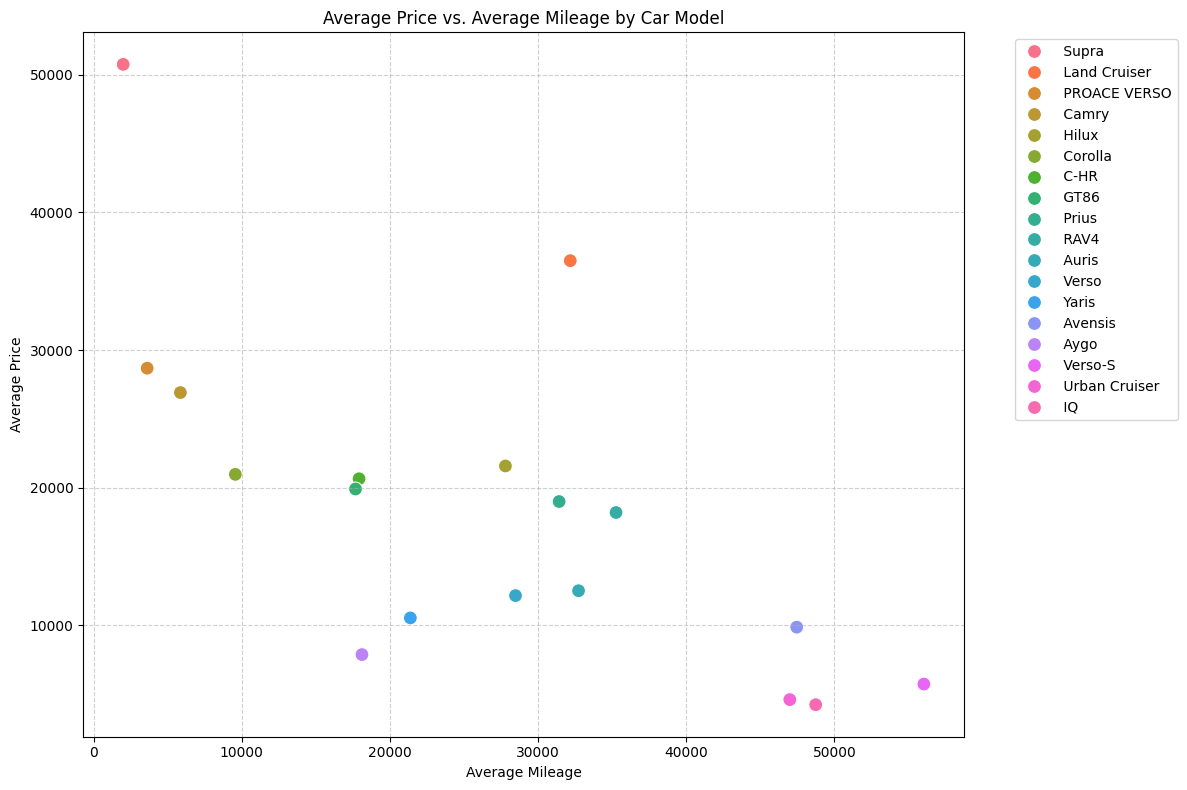

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_df, x='average_mileage', y='average_price', hue='model', s=100)
plt.title('Average Price vs. Average Mileage by Car Model')
plt.xlabel('Average Mileage')
plt.ylabel('Average Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()